In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import os

import matplotlib
# matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

df_1 = pd.read_csv("../output/task1-1.csv")
df_2 = pd.read_csv("../output/task1-2.csv")

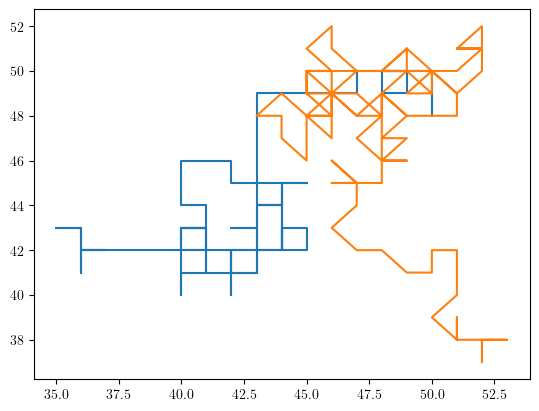

In [9]:
plt.plot(df_1['x'], df_1['y'], label='task1-1')
plt.plot(df_2['x'], df_2['y'], label='task1-2')
plt.show()

In [10]:
# Load all .csv file
data = {}
for file in os.listdir("../output/bulk"):
    if file.endswith(".csv"):
        name = file.split(".")[0]
        record = {}
        record["df"] = pd.read_csv(f"../output/bulk/{file}")
        record["avg_length"] = record["df"]["length"].mean()

        record["diagonal"] = name[6:7] == "2"
        record["start-x"] = int(name[8:10])
        record["start-y"] = int(name[11:13])
        record["end-x"] = int(name[15:17])
        record["end-y"] = int(name[18:20])
        record["distance"] = ((record["end-x"] - record["start-x"])**2 + (record["end-y"] - record["start-y"])**2)**0.5

        data[name] = record

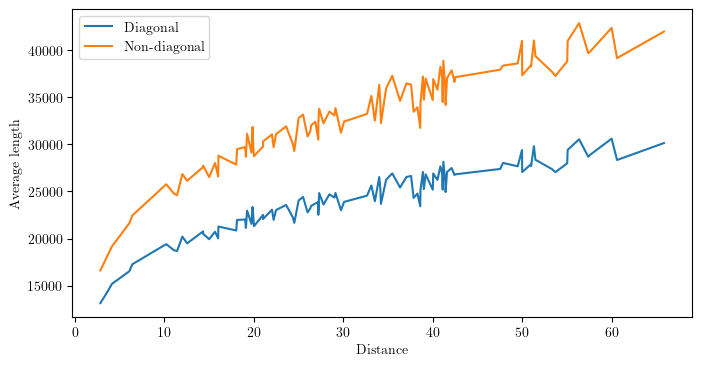

In [11]:
# separate the data into diagonal and non-diagonal
diagonal_data = []
non_diagonal_data = []

for name, info in data.items():
    if info["diagonal"]:
        diagonal_data.append(info)
    else:
        non_diagonal_data.append(info)

# sort the data by distance
diagonal_data.sort(key=lambda x: x["distance"])
non_diagonal_data.sort(key=lambda x: x["distance"])

plt.figure(figsize=(8, 4))
plt.plot([x["distance"] for x in diagonal_data], [x["avg_length"] for x in diagonal_data], label="Diagonal")
plt.plot([x["distance"] for x in non_diagonal_data], [x["avg_length"] for x in non_diagonal_data], label="Non-diagonal")

plt.legend()
plt.xlabel("Distance")
plt.ylabel("Average length")
plt.show()

In [ ]:
# calculate the average length of the path
avg_length_1a = df_1a['length'].mean()
print(avg_length_1a)
plt.plot(df_1a['length'])
plt.plot([0, df_1a['length'].count()], [avg_length_1a, avg_length_1a], label='average path length')
plt.title('task1-1a')
plt.show()

In [ ]:
# calculate the average length of the path
avg_length_2a = df_2a['length'].mean()
print(avg_length_2a)
plt.plot(df_2a['length'])
plt.plot([0, df_2a['length'].count()], [avg_length_2a, avg_length_2a], label='average path length')
plt.title('task1-2a')
plt.show()

In [ ]:
# calculate the mean at each step
rolling_length_1a = []
for i in range(1, df_1a['length'].count()):
    rolling_length_1a.append(df_1a[:i]['length'].mean())
plt.figure(figsize=(8, 4))
plt.plot(rolling_length_1a)
plt.plot([0, df_1a['length'].count()], [avg_length_1a, avg_length_1a], label='average path length')
plt.text(df_1a['length'].count() - 10000, avg_length_1a + 1000, f'{avg_length_1a:.2f}', ha='right')
plt.title('rolling mean')
plt.show()

In [ ]:
# calculate the mean at each step
rolling_length_2a = []
for i in range(1, df_2a['length'].count()):
    rolling_length_2a.append(df_2a[:i]['length'].mean())
plt.figure(figsize=(8, 4))
plt.plot(rolling_length_2a)
plt.plot([0, df_2a['length'].count()], [avg_length_2a, avg_length_2a], label='average path length')
plt.text(df_2a['length'].count() - 10000, avg_length_2a + 1000, "{:.3f}".format(avg_length_2a))
plt.title('rolling mean')
plt.show()